In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [85]:
data = data.drop(['ss_username','cf_username','cc_username'],axis=1)
data.head()

,cf_rating,cc_rating
0,3449.0,3007.0
1,NaN,2906.0
2,NaN,2756.0
3,NaN,2696.0
4,1703.0,2673.0


In [86]:

data = data.dropna(how = 'any')
data.shape

(6442, 2)

<Axes: xlabel='cc_rating', ylabel='cf_rating'>

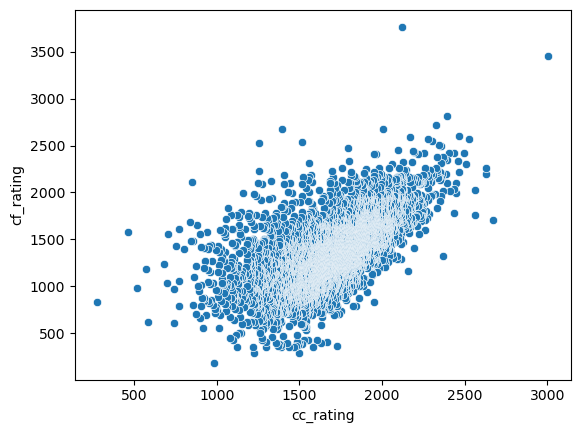

In [87]:

sns.scatterplot(x = 'cc_rating' , y = 'cf_rating',data=data)

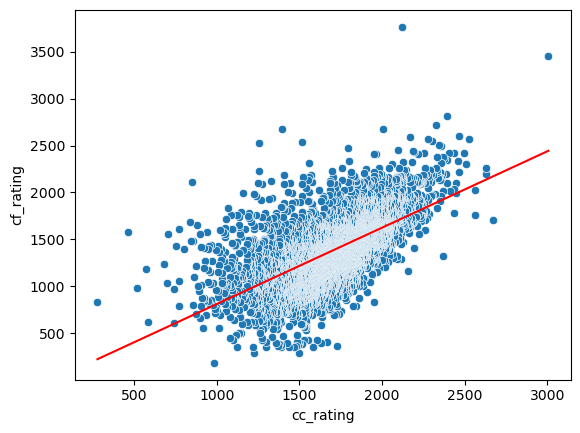

In [88]:

a = 0
b = 0 
alpha = 0.0000001 
epochs = 5000 
x = data['cc_rating'].values 
n = len(x)
def compute(a,x,b): 
    return a * x + b 
def grad_descent(x,y,ypred,n): 
    error = (1/n)*sum((y-ypred)**2) 
    dw = -(2/n)*sum((y-ypred)*x) 
    db = -(2/n)*sum((y-ypred)) 
    return dw,db 

for i in range(epochs): 
    ypred = a*x + b
    dw,db = grad_descent(x,data['cf_rating'],ypred,n) 
    a-= alpha*dw 
    b-= alpha*db
    
ypred = a*x+b  
xplot = np.linspace(x.min(),x.max(),100) 
yplot = a*xplot + b
sns.scatterplot(x = 'cc_rating' , y = 'cf_rating',data=data)
plt.plot(xplot,yplot,color = 'red')
plt.show()